In [1]:
from google.colab import files
uploaded = files.upload()


Saving sample_customer_data.csv.xlsx to sample_customer_data.csv.xlsx


In [3]:
import pandas as pd

# Read the uploaded Excel file
df = pd.read_excel('sample_customer_data.csv.xlsx')
print(df.head())


   CustomerID  Age  Annual Income  Spending Score  Frequency
0           1   19          15000              39          4
1           2   21          16000              81          6
2           3   20          18000               6          2
3           4   23          20000              77          8
4           5   31          25000              40          4


In [4]:
features = df[['Age', 'Annual Income', 'Spending Score', 'Frequency']]


In [8]:
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'Annual Income', 'Spending Score', 'Frequency']]

scaler = StandardScaler()  # Initialize the scaler
scaled_features = scaler.fit_transform(features)  # Apply scaling


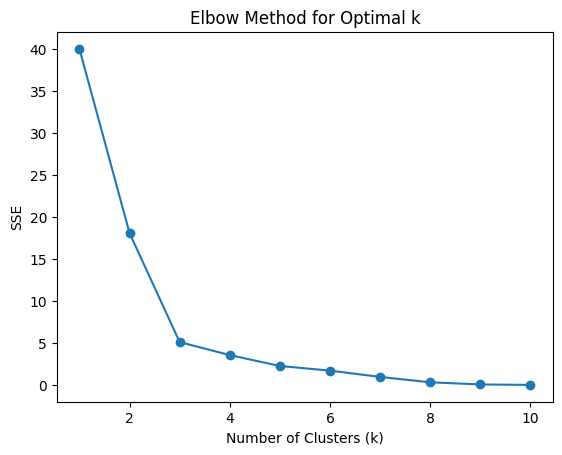

In [10]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Use k from above
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [15]:
# Step 1: Choose optimal k (e.g., 4)
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(scaled_features)

# Step 2: Assign cluster labels
df['Cluster'] = kmeans_final.labels_


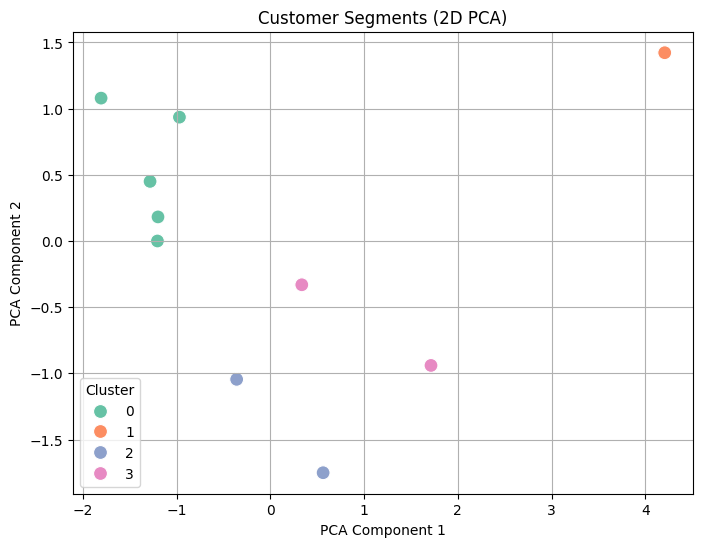

In [16]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Segments (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


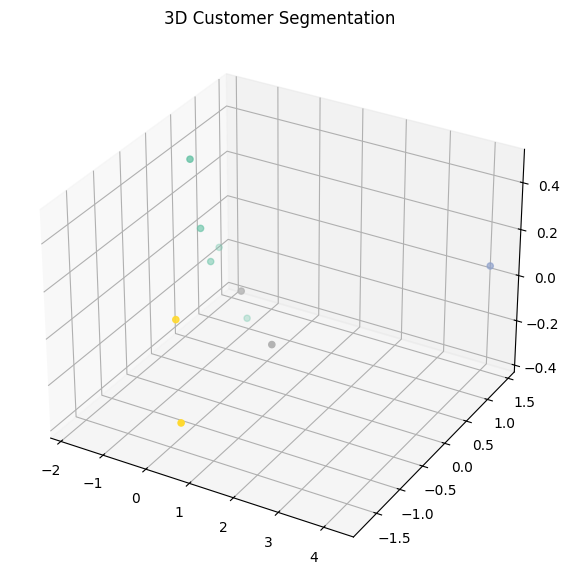

In [17]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_3d = pca.fit_transform(scaled_features)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=df['Cluster'], cmap='Set2')
plt.title("3D Customer Segmentation")
plt.show()


In [18]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score', 'Frequency']].mean()
print(cluster_summary)

df.to_csv("segmented_customers.csv", index=False)


          Age  Annual Income  Spending Score  Frequency
Cluster                                                
0        23.8        20200.0            80.0        8.0
1        64.0        90000.0             3.0        1.0
2        19.5        16500.0            22.5        3.0
3        33.0        30000.0            23.0        2.5
